In [1]:
from noise import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib widget

In [2]:
starti = 38
endi = 42

In [3]:
counters = ['bardeen','bell','curie','feynman','newton','noether','rossi','rubin']
# counters = ['bell','curie','feynman','newton','noether','rossi','rubin']
noise_open_dict = {}
noise_closed_dict = {}
fadc_open_dict = {}
fadc_closed_dict = {}
diff_dict = {}
removed_murmur_dict = {}
freq = freq_mhz()
pos_freq = freq[freq>0]
for counter in counters:
    p_open = Path(f'/home/isaac/niche_data/20240413/{counter}/20240413103137.bg.bin')
    p_closed = Path(f'/home/isaac/niche_data/20240413/{counter}/20240413103057.bg.bin')
    noise_open = read_noise_file(p_open)
    noise_closed = read_noise_file(p_closed)
    fadc_open_dict[counter] = noise_open
    fadc_closed_dict[counter] = noise_closed
    noise_open_dict[counter] = noise_fft(noise_open)
    noise_closed_dict[counter] = noise_fft(noise_closed)
    diff_dict[counter] = noise_open_dict[counter] - noise_closed_dict[counter]
    removed_murmur = diff_dict[counter][freq>0.]
    removed_murmur[:starti] = removed_murmur[starti:endi].mean()
    removed_murmur_dict[counter] = np.concatenate(([diff_dict[counter][0]],removed_murmur,[diff_dict[counter][512]],removed_murmur[::-1]))

[]

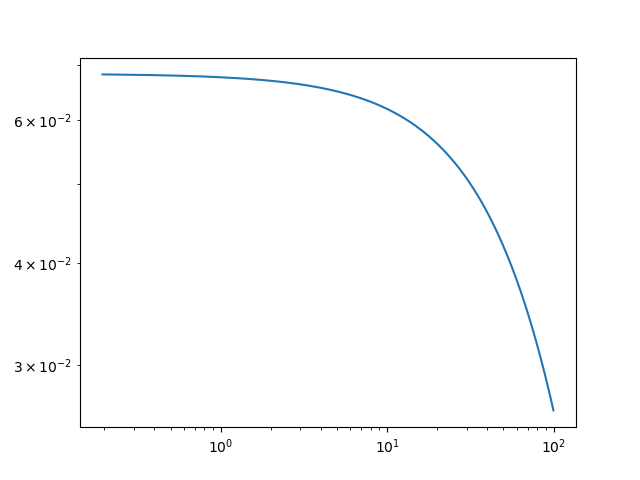

In [4]:
def spectrum_fit(freq: float | np.ndarray, scale: float, freq_corner: float, power:float) -> float | np.ndarray:
    return scale * (1 + ((freq+freq_corner)/freq_corner)) ** (-power)
    # return scale * np.exp(-power*(freq/freq_corner))

plt.figure()
plt.plot(pos_freq, spectrum_fit(pos_freq,70,500,10))
plt.loglog()

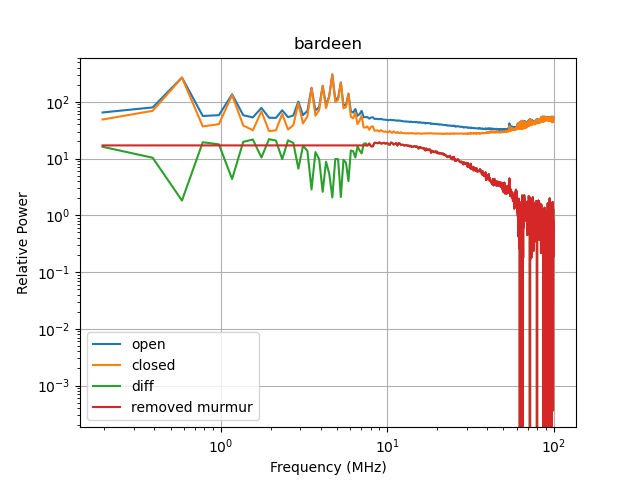

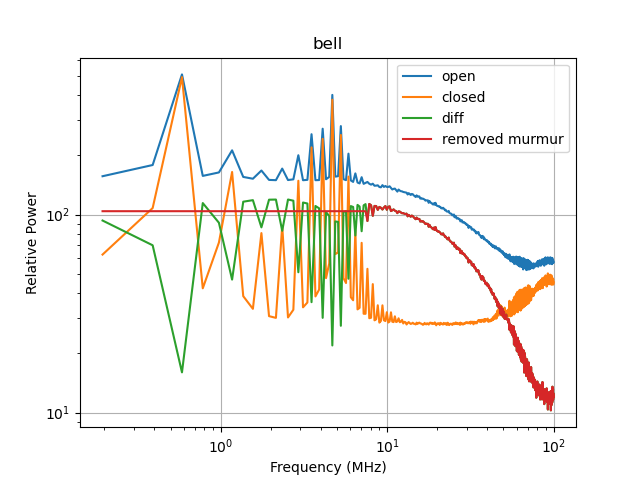

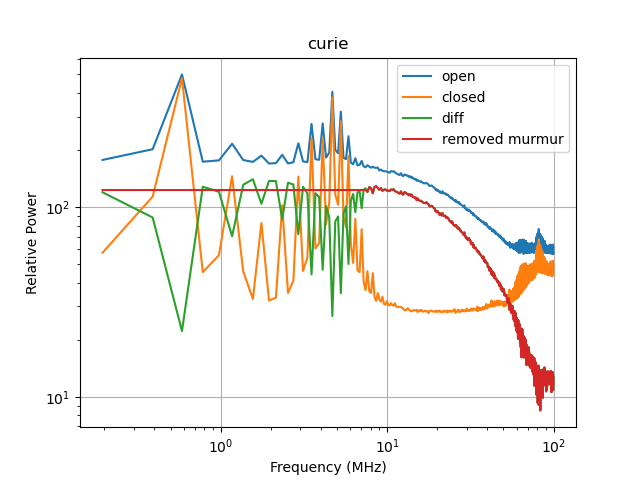

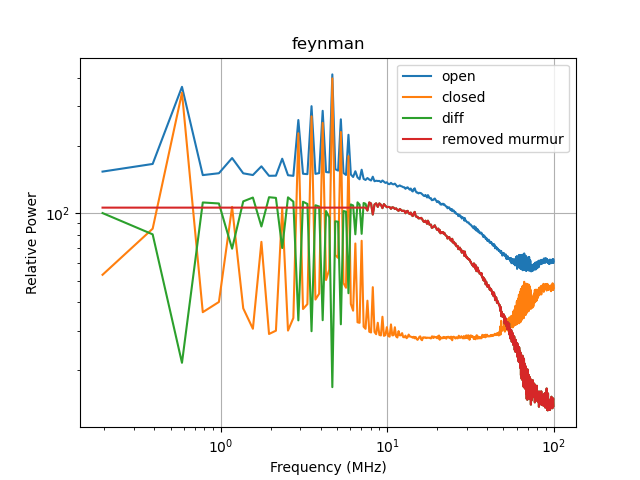

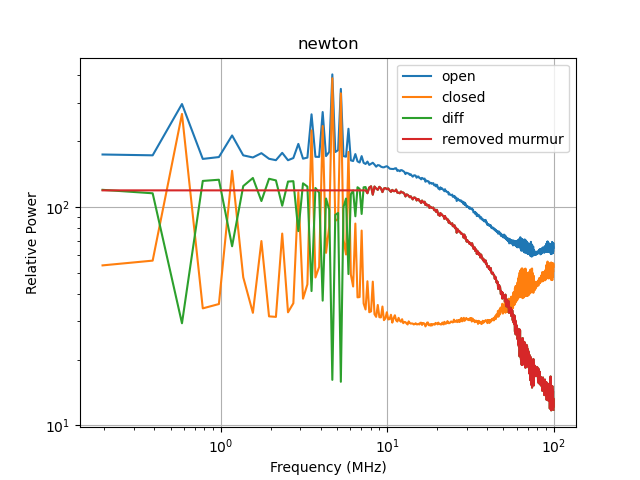

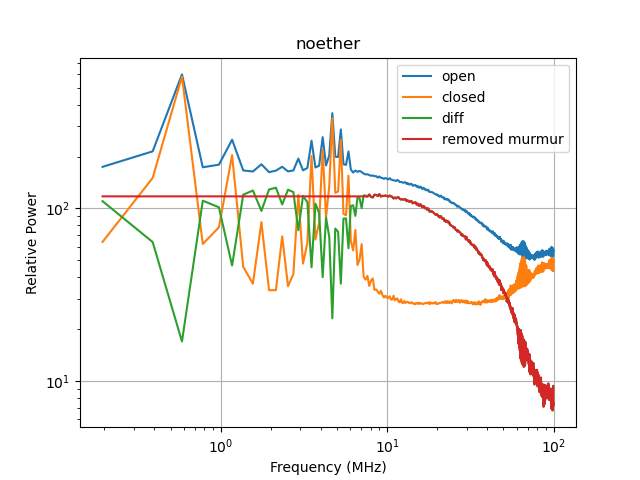

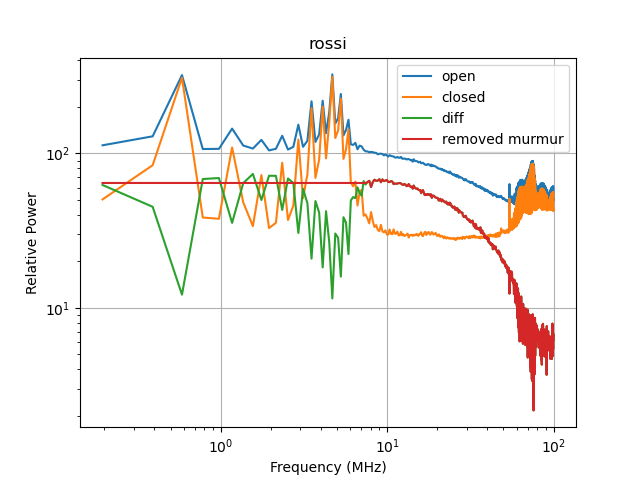

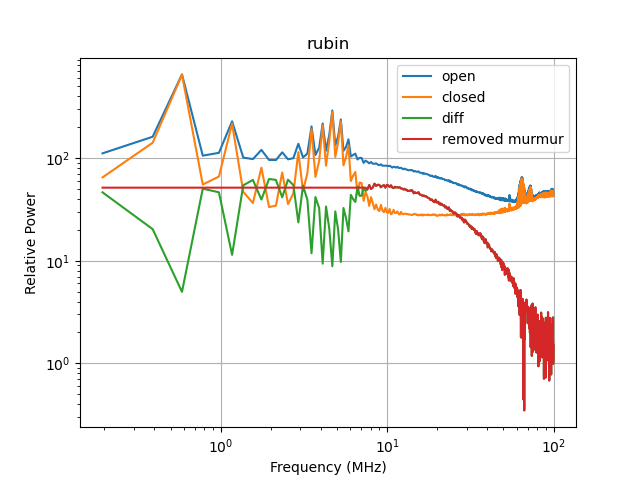

In [5]:


for counter in counters:
    plt.figure()
    # guess = (diff_dict[counter][freq>0.].max(),500,5)
    # popt, pcov = curve_fit(spectrum_fit, pos_freq[:endi], removed_murmur[:endi],p0=guess)
    # plt.plot(pos_freq, spectrum_fit(pos_freq,*popt), label = 'fit')
    plt.plot(freq[freq>0.], noise_open_dict[counter][freq>0.], label = 'open')
    plt.plot(freq[freq>0.], noise_closed_dict[counter][freq>0.], label = 'closed')
    plt.plot(freq[freq>0.], diff_dict[counter][freq>0.], label = 'diff')
    plt.plot(freq[freq>0.], removed_murmur_dict[counter][freq>0.], label = 'removed murmur')
    plt.legend()
    plt.title(counter)
    plt.loglog()
    plt.grid()
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Relative Power')

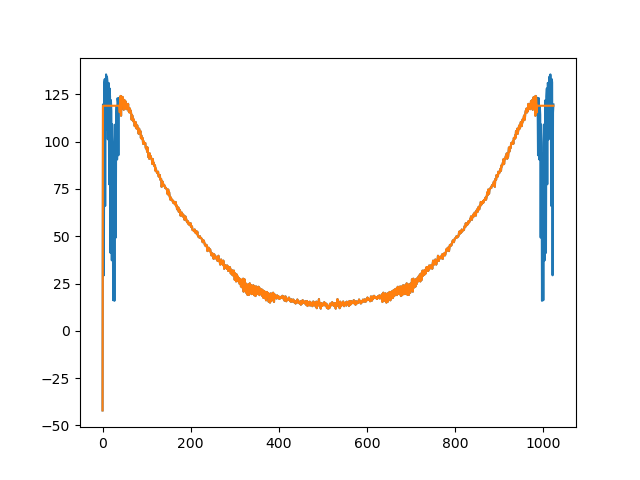

In [6]:
plt.figure()
plt.plot(diff_dict['newton'])
plt.plot(removed_murmur_dict['newton'])

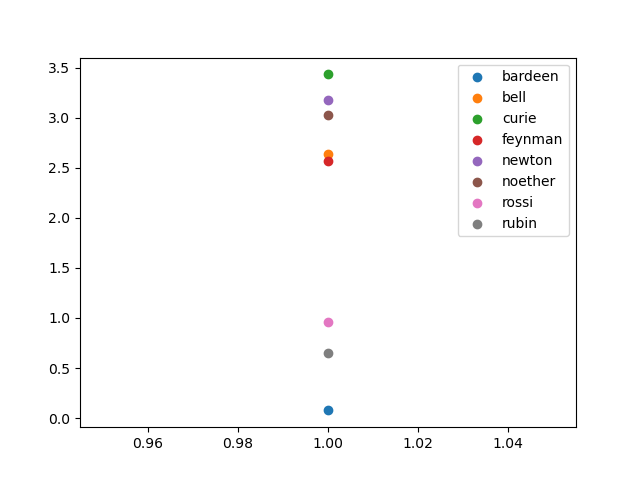

In [7]:
plt.figure()
random_phases = np.random.rand(1023) * 2 * np.pi
for counter in counters:
    flat = np.full_like(removed_murmur_dict[counter], removed_murmur_dict[counter].max())
    gen_ns_signal = random_noise_snapshot(flat,random_phases)
    
    # plt.figure()
    # plt.plot(gen_ns_signal)
    plt.scatter(1,np.var(gen_ns_signal), label = counter)
plt.legend()


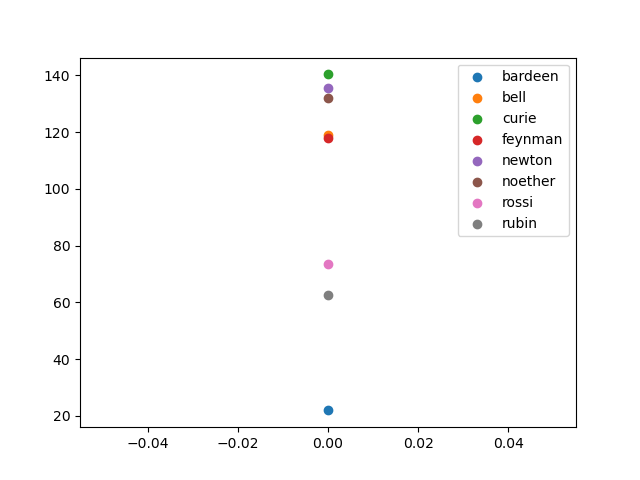

In [13]:
plt.figure()
for counter in counters:
    # noise = random_noise_snapshot(removed_murmur_dict[counter],random_phases)
    plt.scatter(0,diff_dict[counter].max(),label=counter)
plt.legend()

In [9]:
np.var(fadc_open_dict['newton'])

13.462486939787595

In [10]:
np.var(fadc_closed_dict['newton'])

3.008192524713195

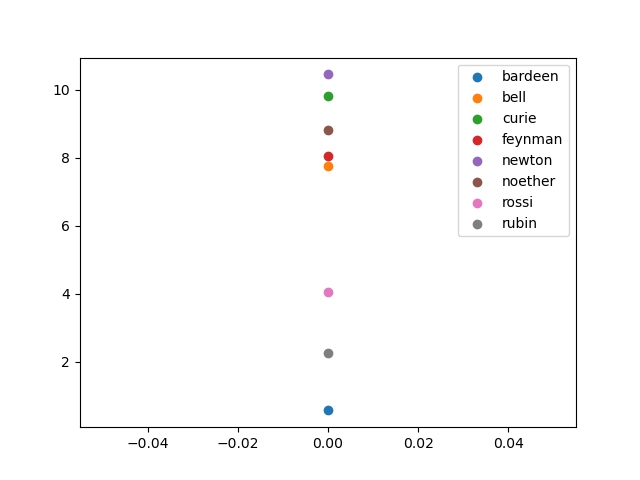

In [11]:
plt.figure()
for counter in counters:
    openvar = np.var(fadc_open_dict[counter])
    closedvar = np.var(fadc_closed_dict[counter])
    plt.scatter(0,openvar-closedvar,label=counter)
plt.legend()